In [4]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

In [5]:
digits=load_digits()

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
import matplotlib.pyplot as plt

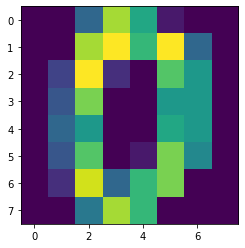

In [10]:
plt.imshow(digits.images[0])

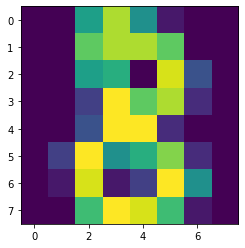

In [11]:
plt.imshow(digits.images[8])

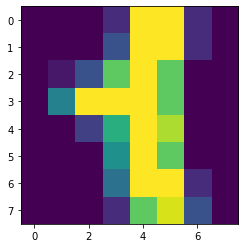

In [12]:
plt.imshow(digits.images[21])

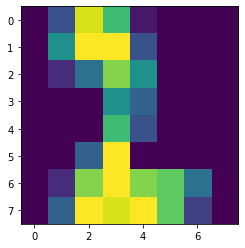

In [13]:
plt.imshow(digits.images[1721])

In [14]:
digits.target[1721]

2

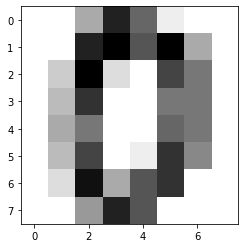

In [15]:
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)

In [16]:
data1=pd.DataFrame(digits.data)

In [17]:
data1.shape

(1797, 64)

In [18]:
type(digits.data)

numpy.ndarray

In [19]:
x=digits.data
y=digits.target

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X_std=StandardScaler().fit_transform(x)

In [22]:
cov_mat=np.cov(X_std)

In [23]:
cov_mat

array([[ 0.5880313 , -0.3517508 , -0.16077981, ..., -0.11934932,
         0.17923085, -0.03301393],
       [-0.3517508 ,  0.62245732,  0.19941243, ...,  0.19328904,
        -0.02909261, -0.11681313],
       [-0.16077981,  0.19941243,  0.84470184, ...,  0.21437087,
        -0.10531818,  0.15647291],
       ...,
       [-0.11934932,  0.19328904,  0.21437087, ...,  0.53365888,
         0.03649137,  0.21765015],
       [ 0.17923085, -0.02909261, -0.10531818, ...,  0.03649137,
         0.50910808,  0.02455871],
       [-0.03301393, -0.11681313,  0.15647291, ...,  0.21765015,
         0.02455871,  0.71882383]])

In [24]:
eig_vals,eig_vec=np.linalg.eig(cov_mat)

In [25]:
eig_vals

array([ 2.09382478e+02+0.00000000e+00j,  1.66350656e+02+0.00000000e+00j,
        1.46693510e+02+0.00000000e+00j, ...,
        4.84742123e-17-4.99408214e-17j,  3.10871432e-17+0.00000000e+00j,
       -1.71766812e-17+0.00000000e+00j])

In [26]:
eig_vec

array([[-0.01668147+0.j        , -0.00922268+0.j        ,
         0.04083253+0.j        , ..., -0.00526986-0.00791584j,
        -0.01441294+0.j        ,  0.01544082+0.j        ],
       [-0.00509626+0.j        ,  0.00889238+0.j        ,
        -0.04035581+0.j        , ...,  0.00044751+0.00066929j,
         0.00040742+0.j        , -0.00132267+0.j        ],
       [-0.01133562+0.j        , -0.0031511 +0.j        ,
        -0.03140352+0.j        , ..., -0.00032174+0.00056142j,
         0.00018728+0.j        ,  0.00033782+0.j        ],
       ...,
       [-0.00891683+0.j        , -0.00144866+0.j        ,
        -0.02596068+0.j        , ..., -0.01161926-0.02208293j,
        -0.01732001+0.j        , -0.00415504+0.j        ],
       [-0.00938573+0.j        , -0.00365442+0.j        ,
         0.02550844+0.j        , ..., -0.01969444-0.01431508j,
        -0.02611125+0.j        ,  0.01497861+0.j        ],
       [ 0.01089722+0.j        , -0.02163646+0.j        ,
        -0.00376114+0.j       

In [27]:
tot=sum(eig_vals)

In [28]:
tot

(1704.4356645051612+0j)

In [29]:
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]

In [30]:
var_exp=np.abs(var_exp)

In [31]:
var_exp

array([1.22845633e+01, 9.75986712e+00, 8.60657361e+00, ...,
       4.40011536e-16, 4.90191324e-16, 5.46961835e-16])

In [32]:
c_var_exp=np.cumsum(var_exp)
c_var_exp=np.abs(c_var_exp)

In [33]:
c_var_exp[6]

50.249657315006225

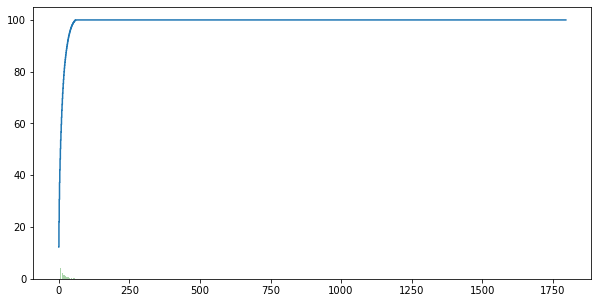

In [36]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp,alpha=0.333,align='center',label='Indiviual explained variance',color='g')
plt.step(range(len(c_var_exp)),c_var_exp,where='mid',label='Cumulativeexplained Variable')